## Final Project Submission

Please fill out:
* Student name: Nicholas Green
* Student pace: self pace
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# Overview
This project analyzes the oppurtunity for Zillow, an online real estate marketplace company, to encourage homeowners in making smart renovations to increase their home's equity. Exploratory data analysis shows trends in home value are related to certain home features and can be touched on to make one's residence more noteworthy. Models can be made using this data to implement a tool Zillow can use to make impactful suggestions.

# Business Understanding
### Stakeholders
Zillow, as previously stated, is an online real estate marketplace company. Online and founded by former Microsoft executives, is a company familiar with implementing user friendly data-driven tools.

### What We Are Answering
We are seeking to provide competitive insight as to which renovations provide value within a home by building a statistical regression model. It will answer how certain renovations tied to certain aspects of a home generate a calulable surplus in home value.

# Data Understanding

### Data Summary
The data comes from the metropolitan King County, Washington, a northwestern part of the country. King County holds a population of 2,269,675 according to the 2020 census, making it more populous than the average county. King County is strongly liberal, has a large minority demographic of at least 35.2 perecent, and its 2016 median household income is above its contemporary US average counterpart 57,617, at 78,800. 

Assuming these characteristics still hold true, it could suggest that prices for renovations may yield more here than other parts of the country since King County seems pricier than the average county. That detail can be overlooked when generalizing our model however, so no cause for concern. The fact that the area is quite diverse helps the model as well, since it helps the model project for all kinds of people using it. Lastly, the population of the area serves to improve the model because the amount of people is sufficient to draw accurate conclusions from.

### Data Representation

#### Understanding The Variables
Now that the data's origin is validated, breaking down each column's significance is important for understanding how each variable is meant to be interpreted. The following is pasted from an accompanying file in this repository

#### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

#### Inspecting The Data
After understanding each part of the data, it is time to explore it, clean it, and find trends within it.

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [32]:
#Loading Data
house_data = pd.read_csv('data/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Observing Data Types
house_data.info()

#Counting Missing Values
house_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
#Oberving Null Denotations
house_data[['waterfront', 'view', 'yr_renovated']].head()

,waterfront,view,yr_renovated
0,NaN,NONE,0.0
1,NO,NONE,1991.0
2,NO,NONE,NaN
3,NO,NONE,0.0
4,NO,NONE,0.0


In [49]:
#Replacing Nulls
for col in house_data.columns:
    try:
        median = house_data[col].median()
        house_data[col] = house_data[col].fillna(value=median)
    except:
        continue
house_data.waterfront = house_data.waterfront.fillna('NO')
house_data.view = house_data.view.fillna('NONE')
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

In [6]:
#Inspecting Filled Values
house_data[['waterfront', 'view', 'yr_renovated']].head()

,waterfront,view,yr_renovated
0,NO,NONE,0.0
1,NO,NONE,1991.0
2,NO,NONE,0.0
3,NO,NONE,0.0
4,NO,NONE,0.0


#### Data Range
I am curious about the dates of the data. Looking up the spread of the years the home were built will describe the ages of the houses we are looking at. I am also curious about the years homes were renovated

In [7]:
house_data[['yr_built', 'yr_renovated']].describe()

,yr_built,yr_renovated
count,21597.000000,21597.000000
mean,1970.999676,68.758207
std,29.375234,364.037499
min,1900.000000,0.000000
25%,1951.000000,0.000000
50%,1975.000000,0.000000
75%,1997.000000,0.000000
max,2015.000000,2015.000000


It looks like the earliest home was built in 1900, meaning the houses range from 1900 to 2015 for a total spread of 115 years. Furthermore, the mean is lower than the median indicating that there is a slight left skew of the data from the earliest builds, but the majority of houses were made within the last 50 years.

The years renovated seems fishy. Houses could not be renovated if they were not built, yet more than 75% of the data says they were renovated in year 0. Perhaps 0 is meant to show that there were not any renovations made, meaning the majority of houses built are the same they have ever been. Further investigation will be needed to better understand the spread of houses that have been renovated. 

In [8]:
#Investigating renovated houses
renovated = house_data['yr_renovated'].sort_values(ascending=False).head((house_data['yr_renovated'] > 0).sum())
house_data['yr_built'].describe(), renovated.describe()

(count    21597.000000
 mean      1970.999676
 std         29.375234
 min       1900.000000
 25%       1951.000000
 50%       1975.000000
 75%       1997.000000
 max       2015.000000
 Name: yr_built, dtype: float64,
 count     744.000000
 mean     1995.928763
 std        15.599946
 min      1934.000000
 25%      1987.000000
 50%      2000.000000
 75%      2007.250000
 max      2015.000000
 Name: yr_renovated, dtype: float64)

In [41]:
renovatied_price = house_data[house_data['yr_renovated'] != 0]['price']
print(renovation.mean())
non_renovated = house_data[house_data['yr_renovated'] == 0]['price']
print(non_renovated.mean())

768901.8924731183
530677.5355358297


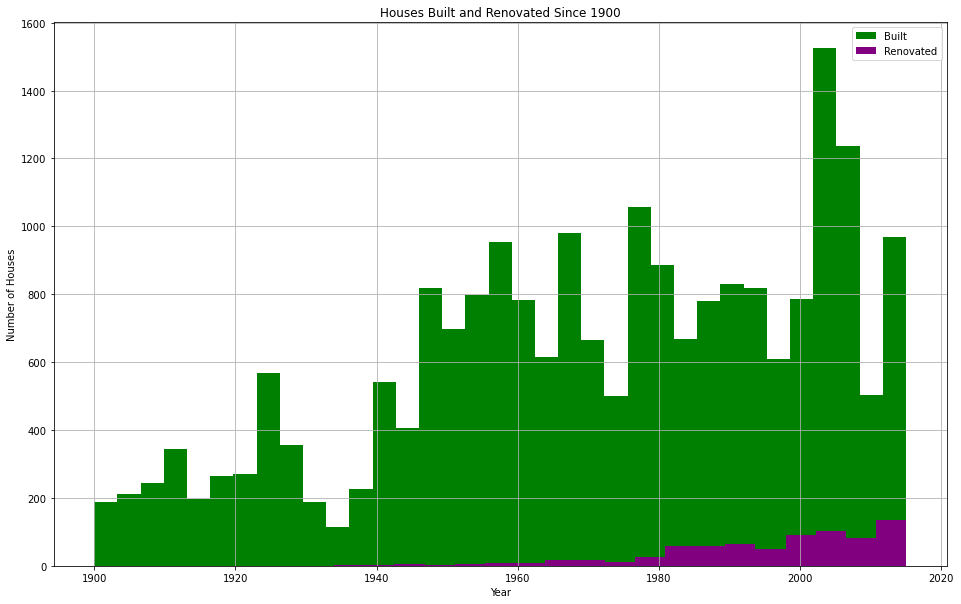

In [9]:
house_data['yr_built'].hist(color='green', label='Built', bins='auto', figsize=(16, 10))
renovated.hist(color='purple', label='Renovated', bins='auto')

plt.legend()
plt.title('Houses Built and Renovated Since 1900')
plt.xlabel('Year')
plt.ylabel('Number of Houses')
plt.show()

In [40]:
house_data['renovated'] = house_data['yr_renovated'][house_data['yr_renovated'] != 0]
len(house_data.renovated) - house_data.renovated.isna().sum()
house_data.renovated.describe()

count     744.000000
mean     1995.928763
std        15.599946
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.250000
max      2015.000000
Name: renovated, dtype: float64

In [ ]:
house_data['renovated'] = house_data['renovated'].fillna(value=0)
for i in house_data['renovated']:
    if i > 0:
        house_data.loc[ i, house_data.renovated] = 1
    else:
        continue
        
house_data['renovated'].unique()

In [ ]:
house_data.yr_renovated.unique()

There are only 744 of the entire 21,597 houses that have been renovated. The renovations range from 1934 to 2015 for a total spread of 81 years. The majority of renovations have been made within the last 30 years which makes sense because some houses built up to that point needed updating. The mean is lower than the median which suggests that the earliest renovations skew the data left.

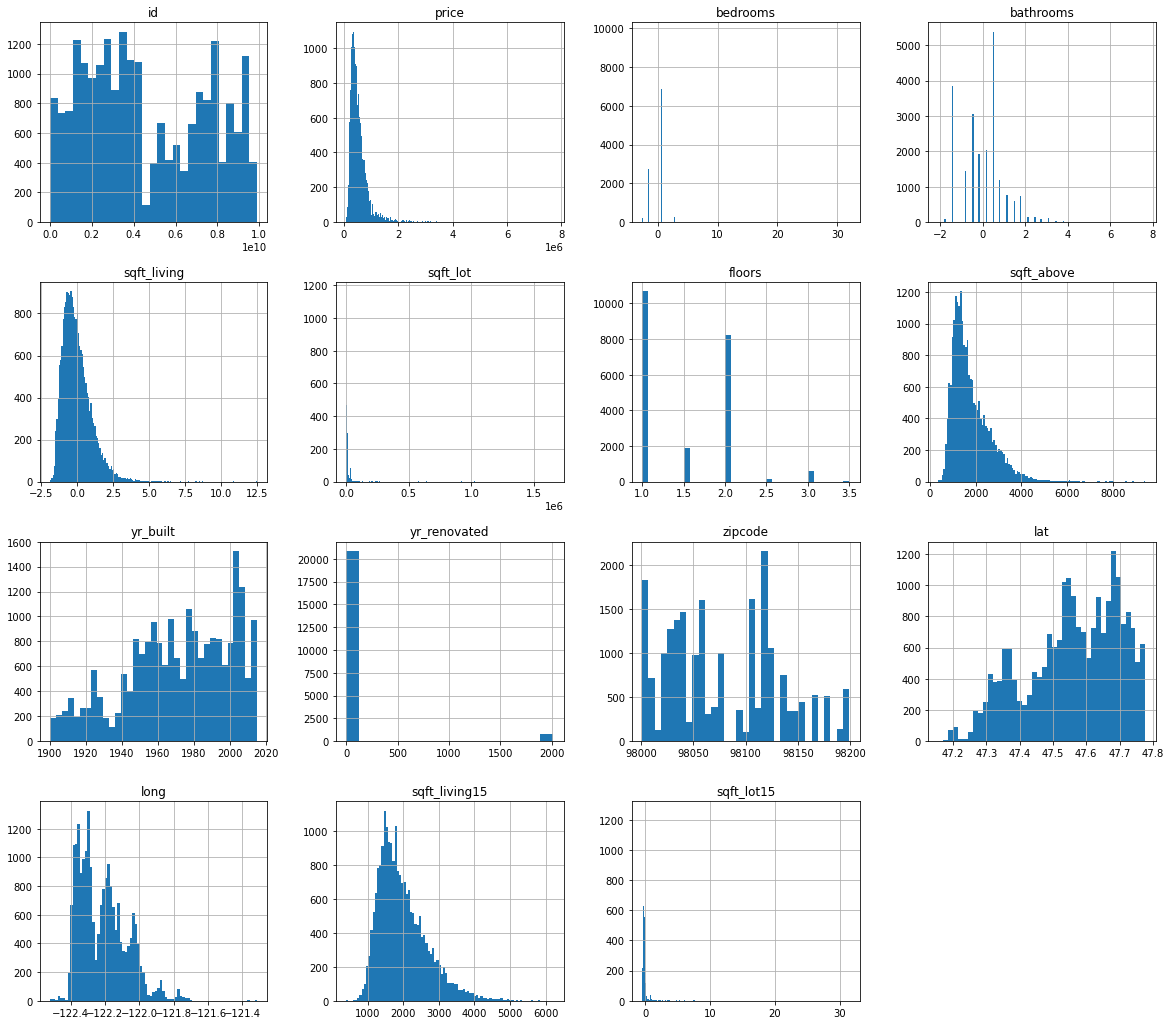

In [182]:
house_data.hist(bins='auto', figsize=(20,18))

plt.show()

In [ ]:
corr = house_data.corr().price
corr

# Modeling

In [385]:
outcome = 'price'
x_cols = ['sqft_living', 'bedrooms', 'bathrooms', 'conds', 'grade']
for col in x_cols:
    house_data[col] = ((house_data[col] - house_data[col].mean())/ house_data[col].std())

In [386]:
from statsmodels.formula.api import ols

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=house_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     5415.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:57:48   Log-Likelihood:            -2.9861e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21591   BIC:                         5.973e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.403e+05   1665.209    324.462      0.000    5.37e+05    5.44e+05
sqft_living  2.015e+05   3262.941     61.762      0.000    1.95e+05    2.08e+05
bedrooms    -4.041e+04   2109.354    -19.155      0.000   -4.45e+04   -3.63e+04
bathrooms   -1.388e+04   2662.491     -5.213      0.000   -1.91e+04   -8660.048
conds        4.239e+04   1701.047     24.923      0.000    3.91e+04    4.57e+04
grade        1.215e+05   2706.592     44.905      0.000    1.16e+05    1.27e+05
==============================================================================
Omnibus:                    16743.573   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           975537.329
Skew:                           3.242   Prob(JB):                         0.00
Kurtosis:                      35.281   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
x_cols = ['sqft_living', 'bedrooms', 'conds']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=house_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     7625.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:09:59   Log-Likelihood:            -2.9959e+05
No. Observations:               21597   AIC:                         5.992e+05
Df Residuals:                   21593   BIC:                         5.992e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.403e+05   1742.067    310.147      0.000    5.37e+05    5.44e+05
sqft_living  2.924e+05   2144.260    136.385      0.000    2.88e+05    2.97e+05
bedrooms    -5.651e+04   2141.220    -26.391      0.000   -6.07e+04   -5.23e+04
conds        3.213e+04   1750.087     18.358      0.000    2.87e+04    3.56e+04
==============================================================================
Omnibus:                    14395.549   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           496602.503
Skew:                           2.723   Prob(JB):                         0.00
Kurtosis:                      25.851   Cond. No.                         1.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [387]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [388]:
X = house_data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

TypeError: 'list' object is not callable

In [154]:
import statsmodels.api as sm
import scipy.stats as stats

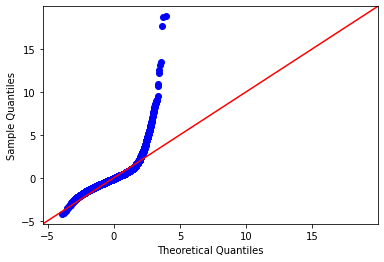

In [389]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

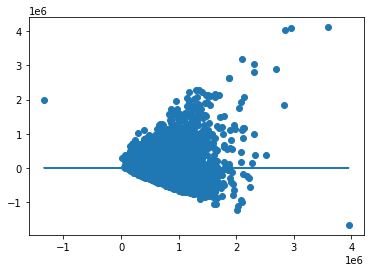

In [252]:
plt.scatter(model.predict(house_data[x_cols]), model.resid)
plt.plot(model.predict(house_data[x_cols]), [0 for i in range(len(house_data))])

In [253]:
from sklearn.model_selection import train_test_split

In [384]:
dummies = pd.get_dummies(house_data.condition, prefix='condition')
dummies

,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
21592,1,0,0,0,0
21593,1,0,0,0,0
21594,1,0,0,0,0
21595,1,0,0,0,0


In [ ]:
merged = pd.concat([house_data.price, house_data.sqft_living, dummies], axis='columns')
merged

In [194]:
final = merged.drop('Very Good', axis ='columns')
final

,price,sqft_living,Average,Fair,Good,Poor
0,221900.0,-0.980629,1,0,0,0
1,538000.0,0.533357,1,0,0,0
2,180000.0,-1.427201,1,0,0,0
3,604000.0,-0.131054,0,0,0,0
4,510000.0,-0.436030,1,0,0,0
...,...,...,...,...,...,...
21592,360000.0,-0.599410,1,0,0,0
21593,400000.0,0.250165,1,0,0,0
21594,402101.0,-1.154901,1,0,0,0
21595,400000.0,-0.523166,1,0,0,0


In [197]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [198]:
X = final.drop('price', axis='columns')
y = final.price

In [199]:
model.fit(X,y)

LinearRegression()

In [204]:
model.predict([[-.98,0,0,0,0]])

array([374308.64340926])

In [354]:
house_data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [287]:
grade = house_data.grade.unique()
grade[0][0], len(grade), grade

('7',
 11,
 array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
        '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
        '13 Mansion'], dtype=object))

In [291]:
house_data['grade'].head()

0        7 Average
1        7 Average
2    6 Low Average
3        7 Average
4           8 Good
Name: grade, dtype: object

In [392]:
def replace1(col):
    new = []
    for i in house_data[col]:
        new.append(int(i[0:2]))
    return new

house_data['grade'] = replace1('grade')
house_data['grade']

TypeError: 'float' object is not subscriptable